In [1]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 47 (delta 16), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (47/47), done.


In [2]:
ls

Mecab-ko-for-Google-Colab/  sample_data/


In [3]:
cd Mecab-ko-for-Google-Colab/

/content/Mecab-ko-for-Google-Colab


In [4]:
ls

images/  install_mecab-ko_on_colab190912.sh  README.md


In [5]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 491kB 44.6MB/s 
     |████████████████████████████████| 92kB 11.5MB/s 
  Created wheel for JPype1: filename=JPype1-0.7.1-cp36-cp36m-linux_x86_64.whl size=2439619 sha256=3729a8c659b8638f8d7cfb0aef71c6796fb16fcf6bf4bcd6e9885016415da8be
  Stored in directory: /root/.cache/pip/wheels/b0/49/6a/4393ef8542c00becf80691bd242693db9e263d6e499323a984
Successfully built JPype1
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2019-12-20 10:19:29--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket

In [6]:
import os, sys 
from google.colab import drive 
drive.mount('/content/mnt') 
nb_path = '/content/notebooks' 
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path) 
sys.path.insert(0, nb_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/mnt


In [7]:
cd /content/mnt/My Drive/Colab Notebooks

/content/mnt/My Drive/Colab Notebooks


In [0]:
import pandas as pd
train_data = pd.read_csv("model_kb_dacon02_trainset.csv")
test_data = pd.read_csv("public_test.csv")

In [0]:
test_data_text = list(test_data['text'])

test_clear_text = []

for i in range(len(test_data_text)):
  test_clear_text.append(test_data_text[i].replace('XXX', ''))
test_data['clear_text'] = test_clear_text

In [10]:
import re

test_clear_text = list(test_data['clear_text'])

test_clear_text2 = []

for text in test_clear_text:
  temp = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', text)
  test_clear_text2.append(temp)
test_data['clear_text2'] = test_clear_text2
test_data

,id,year_month,text,clear_text,clear_text2
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...,고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난주 글...,고객님 안녕하세요 새롭게 시작하는 한 주 행복 가득하시길 기원합니다 지난주 글로벌 ...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...,긴급 안내 은행 가락동 지점 - 헬리오 기본 대출이자를 조합에서 납부...,긴급 안내 은행 가락동 지점 헬리오 기본 대출이자를 조합에서 납부했...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...,고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같든데 ...,고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다엊그제 새해가 시작된거같든데 벌...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...,고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다. 기...,고객님찾아온 행운을 잡으셨나요 못잡으셨다면 이번에 다시 잡으시길 기원합니다 기쁜날...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...,고객님새해 복 많이 받으세요 은행 코스트코 퇴직연금 담당자입니다. 고객님의 소중...,고객님새해 복 많이 받으세요 은행 코스트코 퇴직연금 담당자입니다 고객님의 소중한...
...,...,...,...,...,...
1621,341621,2019-04,(광고)XXX 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동...,(광고) 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동 지점...,광고 고객님안녕하십니까고객님의 소중한 업무처리를 도와드린 kb창원중앙동 지점 계장...
1622,341622,2019-04,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...
1623,341623,2019-04,XXX 고객님 저희 XXX은행 XXX지점을 이용해주셔서 감사드립니다 이번주도 더 ...,고객님 저희 은행 지점을 이용해주셔서 감사드립니다 이번주도 더 없이 즐겁고 행복...,고객님 저희 은행 지점을 이용해주셔서 감사드립니다 이번주도 더 없이 즐겁고 행복...
1624,341624,2019-04,(광고)알림 신청하면 매일 현금 100만원! XXX부동산 리브온지금 XXX부동산 리...,(광고)알림 신청하면 매일 현금 100만원! 부동산 리브온지금 부동산 리브온 App...,광고알림 신청하면 매일 현금 100만원 부동산 리브온지금 부동산 리브온 App에서 ...


In [11]:
train_data

,Unnamed: 0,id,year_month,text,smishing,len,clear_text,len2,clear_text2
0,0,10,2017-01,(광고)XXXBaXXX고객님들 뒤엔XXX 언제나 XXX새로운 마음가짐으로 새롭게 준...,1,917,(광고)Ba고객님들 뒤엔 언제나 새로운 마음가짐으로 새롭게 준비합니다.당행상품의 자...,878,광고Ba고객님들 뒤엔 언제나 새로운 마음가짐으로 새롭게 준비합니다당행상품의 자격기준...
1,1,23,2017-01,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,0,749,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,743,시장동향0130 마감 기준KOSPI 208359pt081126 마감 기준 KOSPI...
2,2,26,2017-01,(광고)XXX추가 XXX품 특판 안내문XXX 지점에서 취급하고 있는 여신 XXX...,1,399,(광고)추가 품 특판 안내문 지점에서 취급하고 있는 여신 드림론과 달리 여신영...,363,광고추가 품 특판 안내문 지점에서 취급하고 있는 여신 드림론과 달리 여신영업부...
3,3,36,2017-01,(광고)XXX신용관리 XXX 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가...,1,941,(광고)신용관리 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가가 대신해주...,914,광고신용관리 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가가 대신해주지 ...
4,4,45,2017-01,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,1,937,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,904,광고안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA 수신...
...,...,...,...,...,...,...,...,...,...
37401,37401,336362,2018-12,(광고)XXX금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내...,1,1034,(광고)금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내고 있...,1013,광고금전을 요구하는건 사기입니다 유의하세요1부득이하게 높은 이자를 내고 있는 분2월...
37402,37402,336366,2018-12,(광고)XXX나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부...,1,911,(광고)나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부득이하...,893,광고나의 한도금리를 알아보자금전을 요구하는건 사기입니다 유의하세요1부득이하게 높은 ...
37403,37403,336369,2018-12,(광고) XXX항상 (XXX국민)은행을 이용해주셔서 감사합니다. 2018년 12월 ...,1,474,(광고) 항상 (국민)은행을 이용해주셔서 감사합니다. 2018년 12월 신상품이 출...,444,광고 항상 국민은행을 이용해주셔서 감사합니다 2018년 12월 신상품이 출시되여서 ...
37404,37404,336370,2018-12,(광고)XXX가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준...,1,826,(광고)가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준이 완...,814,광고가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준이 완화되...


In [12]:
from konlpy.tag import Okt
from konlpy.tag import Mecab
okt = Okt()
mecab = Mecab()

/content/notebooks/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [0]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [0]:
from tqdm import tqdm
X_train = []
for i in range(len(train_data['clear_text2'])):
  temp_X = []
  temp_X = okt.morphs(train_data['clear_text2'].iloc[i], stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_train.append(temp_X)

In [15]:
X_test = []
for i in tqdm(range(len(test_data['clear_text2']))):
  temp_X = []
  temp_X = okt.morphs(test_data['clear_text2'].iloc[i], stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_test.append(temp_X)

100%|██████████| 1626/1626 [00:35<00:00, 46.33it/s]


In [16]:
print(X_train[:3])

[['광고', 'Ba', '고객', '들다', '언제나', '새롭다', '마음가짐', '새롭다', '준비', '상품', '자격', '기준', '심사', '기준', '완화', '되어다', '상품', '대해', '간단하다', '상품', '정보', '전달', '드리다', '수신', '희망', '않다', '경우', '에는', '거부', '라는', '답장', '주시', 'KISA', '수신', '거부', '목록', '등록', '시키다', '다시', '발송', '되다', '않다', '조치', '해드리다', '신청', '방법', '터치', '문자', '상담', '또는', '00시', '00분', '상담', '이라고', '답장', '보내다', '전화', '주시', '친절하다', '안전하다', '상담', '도움', '드리다', '카카오', '상담', '서비스', '시행', 'citibankloan', '친구', '추가', '상담', '신청', '이렇다', '해드리다', '시중', '은행권', '에서', '기존', '한도', '모두', '사용', '이신', '대출', '원리금', '균등', '방식', '인하다', '불입', '금액', '부담스럽다', '채무', '금액', '작다', '무겁다', '많다', '관리', '되다', '고객', '들다', '말씀드리다', '높다', '금리', '때문', '힘들다', '느끼다', '대출', '필요하다', '언제나', '고객', '들다', '에서', '든든하다', '파트너', '로서', '드리다', '상품', '특징', '거래', '없다', '진행', '가능', '시중', '은행권', '보다', '높다', '한도', '자체', '등급', '판단', '하므다', '낮다', '신용', '진행', '가능', '부채', '많다', '부채', '통합', '상품', '전환', '가능', '원리금', '균등', '방식', '이자', '입하', '만기일', '시로', '전환', '가능', '가상', '조회', '통해', '한도', '금리', '확인가능',

In [17]:
print(X_test[:3])

[['고객', '안녕하다', '새롭다', '시작', '행복', '가득하다', '기원', '지난주', '글로벌', '증시', '파월', '밉다', '의장', '통화정책', '대해', '완화', '태도', '변화', '보이다', '주초', '투자', '심리', '개선', '이어지다', '크다', '상승', '마감', '더불다', '밉다', '차관', '무역', '협상', '진행', '되다', '점도', '긍정', '이다', '달러', '환율', '주간', '75원', '하락', '가운데', '외국인', '투자자', '국내', '증시', '매수', '규모', '8천억', '상회', '수급', '개선', '되다', '점도', '주목', '해보다', '필요', '있다', '금주', '시장', '미국', '금융', '실적', '발표', '시작', '본격', '실적', '시즌', '진입', '되다', '지난주', '애플', '삼성', '전자', '주요', '기업', '1분', '실적', '전망', '하향', '조정', '있다', '참고', '올해', '글로벌', '성장', '둔화', '조속', '에서', '기업', '감소', '추이', '관심', '있다', '살펴보다', '필요', '있다', '보이다', '후반', '에는', '브렉', '시트', '영국', '하원', '표결', '예정', '되어다', '있다', '추워지다', '날씨', '건강', '유의', '좋다', '한주', '되다', '감사하다', '은행', '송도', '센터', '올리다'], ['긴급', '안내', '은행', '가락동', '지점', '헬리', '기본', '대출', '이자', '조합', '에서', '납부', '2018년', '12월', '25일', '부로', '종료', '되어다', '따라서', '2019년', '1월', '25일', '부터', '매월', '25일', '중도', '대출', '이자', '계약', '께서', '직접', '납부', '되다', '방법', '안내', '자동', '이체', '등록',

In [18]:
from keras.preprocessing.text import Tokenizer
max_words = 35000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

Using TensorFlow backend.


In [19]:
print(X_train[:3])

[[15, 2639, 9, 166, 1067, 388, 3480, 388, 587, 1, 55, 99, 324, 99, 306, 69, 1, 131, 314, 1, 145, 500, 5, 53, 100, 29, 50, 206, 13, 231, 78, 26, 869, 53, 13, 409, 170, 130, 251, 137, 6, 29, 207, 56, 12, 37, 795, 25, 8, 86, 364, 371, 8, 87, 78, 89, 39, 26, 140, 248, 8, 71, 5, 351, 8, 52, 274, 1126, 233, 35, 8, 12, 509, 56, 150, 92, 14, 117, 11, 168, 47, 310, 4, 67, 75, 43, 79, 564, 44, 318, 63, 44, 187, 1167, 41, 54, 6, 9, 166, 1766, 110, 3, 313, 1223, 1154, 4, 118, 1067, 9, 166, 14, 449, 1495, 1759, 5, 1, 180, 103, 42, 19, 10, 150, 92, 32, 110, 11, 80, 30, 123, 384, 96, 28, 19, 10, 20, 41, 20, 16, 1, 38, 10, 67, 75, 43, 46, 472, 199, 340, 38, 10, 163, 93, 196, 11, 3, 457, 1, 36, 24, 599, 28, 1, 11, 33, 122, 584, 23, 3, 73, 431, 55, 7, 80, 30, 138, 195, 45, 68, 49, 63, 16, 38, 1, 11, 119, 84, 159, 169, 3, 73, 431, 55, 7, 80, 30, 138, 195, 45, 68, 49, 100, 236, 11, 33, 1208, 3, 476, 55, 119, 584, 197, 9, 76, 80, 30, 45, 15], [273, 1760, 11333, 201, 99, 484, 10320, 211, 11334, 201, 99, 484

In [20]:
print(X_test[:3])

[[9, 109, 388, 451, 372, 651, 493, 1691, 703, 148, 2386, 538, 2016, 1664, 131, 306, 4649, 1770, 424, 11198, 268, 543, 639, 1477, 395, 82, 201, 1434, 538, 15062, 434, 1256, 19, 6, 3265, 1266, 18, 676, 514, 2020, 175, 998, 625, 1593, 460, 148, 807, 1488, 2214, 815, 639, 6, 3265, 1876, 762, 359, 2, 1655, 273, 332, 17, 336, 841, 451, 1343, 336, 1500, 978, 6, 1691, 2008, 1731, 1324, 440, 138, 1086, 336, 749, 2200, 626, 2, 552, 386, 703, 1818, 698, 5896, 14, 138, 171, 908, 146, 2, 1791, 359, 2, 424, 2327, 206, 2195, 2182, 1637, 2087, 3914, 817, 69, 2, 1977, 719, 212, 292, 174, 1493, 6, 72, 7, 2561, 184, 66], [4326, 36, 7, 5853, 57, 8923, 447, 4, 46, 7103, 14, 226, 224, 621, 1202, 870, 1452, 69, 721, 1862, 352, 1202, 128, 249, 1202, 452, 4, 46, 1040, 152, 307, 226, 6, 37, 36, 485, 729, 170, 7, 283, 369, 266, 970, 541, 275, 151, 208, 4, 142, 4, 46, 485, 226, 142, 485, 729, 170, 1810, 282, 235, 716, 857, 1057, 485, 729, 170, 485, 729, 5453, 9, 23, 747, 7, 283, 266, 4, 46, 226, 4, 46, 249, 1202,

문자의 최대 길이 : 315
문자의 평균 길이 :  163.654841469283


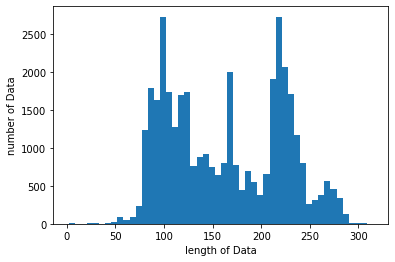

In [21]:
import matplotlib.pyplot as plt

print("문자의 최대 길이 :" , max(len(l) for l in X_train))
print("문자의 평균 길이 : ", sum(map(len, X_train))/ len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

문자의 최대 길이 :  287
문자의 평균 길이 :  69.92250922509226


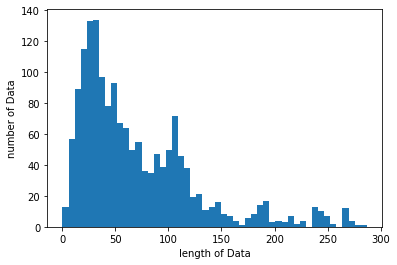

In [22]:
print("문자의 최대 길이 : ", max(len(l) for l in X_test))
print("문자의 평균 길이 : ", sum(map(len, X_test))/ len(X_test))
plt.hist([len(s) for s in X_test], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [0]:
from keras.utils import np_utils
import numpy as np

y_train = []

for i in range(len(train_data['smishing'])):
  if train_data['smishing'].iloc[i] == 1:
    y_train.append([0, 1])
  elif train_data['smishing'].iloc[i] == 0:
    y_train.append([1, 0])

y_train = np.array(y_train)

In [0]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [0]:
max_len = 315 # 전체 데이터의 길이를 380로 맞춘다

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [0]:
import pickle

with open('tokenizer_rank18.pickle', 'wb') as handle:
  pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [27]:
model3 = Sequential()
model3.add(Embedding(max_words, 100))
model3.add(LSTM(128))
model3.add(Dense(2, activation='sigmoid'))

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.1)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 33665 samples, validate on 3741 samples
Epoch 1/3





33665/33665 [==============================] - 527s 16ms/step - loss: 0.0326 - acc: 0.9930 - val_loss: 0.0263 - val_acc: 0.9957
Epoch 2/3
33665/33665 [==============================] - 524s 16ms/step - loss: 0.0013 - acc: 0.9997 - val_loss: 0.0166 - val_acc: 0.9960
Epoch 3/3
33665/33665 [==============================] - 542s 16ms/step - loss: 2.0441e-04 - acc: 1.0000 - val_loss: 0.0225 - val_acc: 0.9957


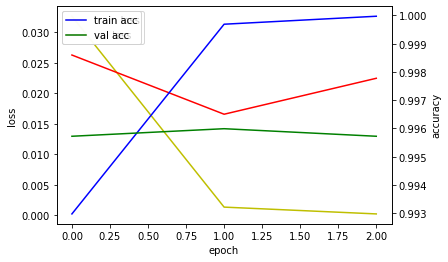

In [28]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history3.history['loss'], 'y', label='train loss')
loss_ax.plot(history3.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history3.history['acc'], 'b', label='train acc')
acc_ax.plot(history3.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
model3.save("model_kb_dacon_19_1.h5")

In [30]:
mypredict = model3.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_19_1.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_19_1.csv")

,id,smishing
0,340000,0.000009
1,340001,0.004312
2,340002,0.000014
3,340003,0.000012
4,340004,0.000009
...,...,...
1621,341621,0.000034
1622,341622,0.000017
1623,341623,0.000005
1624,341624,0.000012


In [31]:
pd.read_csv("kb_submission_14.csv")

,id,smishing
0,340000,0.000013
1,340001,0.000363
2,340002,0.000008
3,340003,0.000015
4,340004,0.000007
...,...,...
1621,341621,0.000052
1622,341622,0.000012
1623,341623,0.000004
1624,341624,0.000052


In [32]:
model4 = Sequential()
model4.add(Embedding(max_words, 100))
model4.add(LSTM(128))
model4.add(Dense(2, activation='sigmoid'))

model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history4 = model4.fit(X_train, y_train, epochs=5, batch_size=500, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/5
33665/33665 [==============================] - 282s 8ms/step - loss: 0.3711 - acc: 0.9123 - val_loss: 0.1484 - val_acc: 0.9905
Epoch 2/5
33665/33665 [==============================] - 277s 8ms/step - loss: 0.0438 - acc: 0.9985 - val_loss: 0.0237 - val_acc: 0.9984
Epoch 3/5
33665/33665 [==============================] - 275s 8ms/step - loss: 0.0115 - acc: 0.9988 - val_loss: 0.0103 - val_acc: 0.9995
Epoch 4/5
33665/33665 [==============================] - 273s 8ms/step - loss: 0.0043 - acc: 0.9997 - val_loss: 0.0078 - val_acc: 0.9989
Epoch 5/5
33665/33665 [==============================] - 272s 8ms/step - loss: 0.0020 - acc: 0.9999 - val_loss: 0.0069 - val_acc: 0.9979


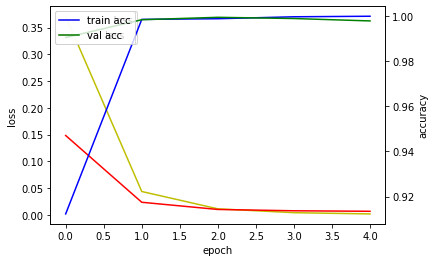

In [33]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history4.history['loss'], 'y', label='train loss')
loss_ax.plot(history4.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history4.history['acc'], 'b', label='train acc')
acc_ax.plot(history4.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
model4.save("model_kb_dacon_14_2.h5")

In [34]:
mypredict = model4.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_19_2.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_19_2.csv")

,id,smishing
0,340000,0.000974
1,340001,0.066844
2,340002,0.012355
3,340003,0.013590
4,340004,0.001090
...,...,...
1621,341621,0.000402
1622,341622,0.007493
1623,341623,0.003905
1624,341624,0.000354


In [0]:
model5 = Sequential()
model5.add(Embedding(max_words, 100))
model5.add(LSTM(128))
model5.add(Dense(2, activation='sigmoid'))

model5.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])
history5 = model5.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/1
33665/33665 [==============================] - 578s 17ms/step - loss: 0.0267 - acc: 0.9932 - val_loss: 0.0114 - val_acc: 0.9963


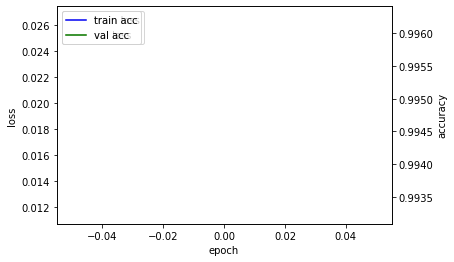

In [0]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history5.history['loss'], 'y', label='train loss')
loss_ax.plot(history5.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history5.history['acc'], 'b', label='train acc')
acc_ax.plot(history5.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
mypredict = model5.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_14_3.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_14_3.csv")

,id,smishing
0,340000,0.000191
1,340001,0.004317
2,340002,0.000064
3,340003,0.000086
4,340004,0.000072
...,...,...
1621,341621,0.001146
1622,341622,0.000157
1623,341623,0.000052
1624,341624,0.000957


In [35]:
model6 = Sequential()
model6.add(Embedding(max_words, 100))
model6.add(LSTM(128))
model6.add(Dense(2, activation='sigmoid'))

model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history6 = model6.fit(X_train, y_train, epochs=2, batch_size=128, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/2
33665/33665 [==============================] - 299s 9ms/step - loss: 0.0692 - acc: 0.9760 - val_loss: 0.0076 - val_acc: 0.9981
Epoch 2/2
33665/33665 [==============================] - 304s 9ms/step - loss: 0.0059 - acc: 0.9991 - val_loss: 0.0085 - val_acc: 0.9976


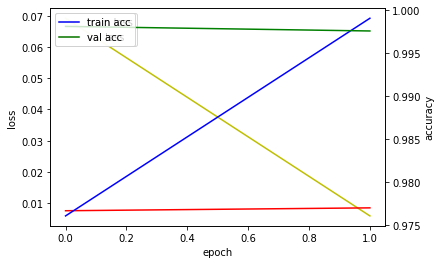

In [36]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history6.history['loss'], 'y', label='train loss')
loss_ax.plot(history6.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history6.history['acc'], 'b', label='train acc')
acc_ax.plot(history6.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [37]:
train_data

,Unnamed: 0,id,year_month,text,smishing,len,clear_text,len2,clear_text2
0,0,10,2017-01,(광고)XXXBaXXX고객님들 뒤엔XXX 언제나 XXX새로운 마음가짐으로 새롭게 준...,1,917,(광고)Ba고객님들 뒤엔 언제나 새로운 마음가짐으로 새롭게 준비합니다.당행상품의 자...,878,광고Ba고객님들 뒤엔 언제나 새로운 마음가짐으로 새롭게 준비합니다당행상품의 자격기준...
1,1,23,2017-01,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,0,749,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,743,시장동향0130 마감 기준KOSPI 208359pt081126 마감 기준 KOSPI...
2,2,26,2017-01,(광고)XXX추가 XXX품 특판 안내문XXX 지점에서 취급하고 있는 여신 XXX...,1,399,(광고)추가 품 특판 안내문 지점에서 취급하고 있는 여신 드림론과 달리 여신영...,363,광고추가 품 특판 안내문 지점에서 취급하고 있는 여신 드림론과 달리 여신영업부...
3,3,36,2017-01,(광고)XXX신용관리 XXX 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가...,1,941,(광고)신용관리 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가가 대신해주...,914,광고신용관리 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가가 대신해주지 ...
4,4,45,2017-01,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,1,937,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,904,광고안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA 수신...
...,...,...,...,...,...,...,...,...,...
37401,37401,336362,2018-12,(광고)XXX금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내...,1,1034,(광고)금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내고 있...,1013,광고금전을 요구하는건 사기입니다 유의하세요1부득이하게 높은 이자를 내고 있는 분2월...
37402,37402,336366,2018-12,(광고)XXX나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부...,1,911,(광고)나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부득이하...,893,광고나의 한도금리를 알아보자금전을 요구하는건 사기입니다 유의하세요1부득이하게 높은 ...
37403,37403,336369,2018-12,(광고) XXX항상 (XXX국민)은행을 이용해주셔서 감사합니다. 2018년 12월 ...,1,474,(광고) 항상 (국민)은행을 이용해주셔서 감사합니다. 2018년 12월 신상품이 출...,444,광고 항상 국민은행을 이용해주셔서 감사합니다 2018년 12월 신상품이 출시되여서 ...
37404,37404,336370,2018-12,(광고)XXX가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준...,1,826,(광고)가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준이 완...,814,광고가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준이 완화되...


In [0]:
pos_df = train_data[train_data['smishing'] == 0]
neg_df = train_data[train_data['smishing'] == 1]

pos_df_train = pos_df.iloc[:16883]
pos_df_validation = pos_df.iloc[16883:]

neg_df_train = pos_df.iloc[:16883]
neg_df_validation = neg_df.iloc[16883:]

In [41]:
pos_df_train

,Unnamed: 0,id,year_month,text,smishing,len,clear_text,len2,clear_text2
1,1,23,2017-01,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,0,749,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,743,시장동향0130 마감 기준KOSPI 208359pt081126 마감 기준 KOSPI...
5,5,54,2017-01,새해는 모든분들 행복과 행운이 넘치는 한해가 되길 기도드리며 새해 복 많이 받으...,0,542,새해는 모든분들 행복과 행운이 넘치는 한해가 되길 기도드리며 새해 복 많이 받으...,536,새해는 모든분들 행복과 행운이 넘치는 한해가 되길 기도드리며 새해 복 많이 받으...
7,7,61,2017-01,(광고)XXX 고객님광고)XXX고객님 안녕하십니까? XXX은행 XXX점 XXX차장 ...,0,442,(광고) 고객님광고)고객님 안녕하십니까? 은행 점 차장 입니다. 항상 저희 수색지점...,388,광고 고객님광고고객님 안녕하십니까 은행 점 차장 입니다 항상 저희 수색지점을 이용해...
10,10,82,2017-01,XXX 고객님 안녕하세요! 가산디지털종금센터에 XXX부센터장입니다. 정유년 새X...,0,499,고객님 안녕하세요! 가산디지털종금센터에 부센터장입니다. 정유년 새 고객님의 가...,469,고객님 안녕하세요 가산디지털종금센터에 부센터장입니다 정유년 새 고객님의 가정에...
14,14,155,2017-01,XXX 고객님안녕하세요?항상 저희 XXX은행 죽XXX점에 베풀어주시는 성원과 애정에...,0,393,고객님안녕하세요?항상 저희 은행 죽점에 베풀어주시는 성원과 애정에 깊은 감사를 드...,363,고객님안녕하세요항상 저희 은행 죽점에 베풀어주시는 성원과 애정에 깊은 감사를 드립...
...,...,...,...,...,...,...,...,...,...
32972,32972,318108,2018-10,고객님 안녕하십니까?XXX은행에 대한 고객님의 변함없는 관심과 성원에 감사 드립니다...,0,904,고객님 안녕하십니까?은행에 대한 고객님의 변함없는 관심과 성원에 감사 드립니다.미중...,874,고객님 안녕하십니까은행에 대한 고객님의 변함없는 관심과 성원에 감사 드립니다미중 무...
32974,32974,318119,2018-10,고객님 안녕하십니까?XXX은행에 대한 고객님의 변함없는 관심과 성원에 감사 드립니다...,0,898,고객님 안녕하십니까?은행에 대한 고객님의 변함없는 관심과 성원에 감사 드립니다.미중...,868,고객님 안녕하십니까은행에 대한 고객님의 변함없는 관심과 성원에 감사 드립니다미중 무...
32975,32975,318121,2018-10,고객님 안녕하십니까?XXX은행에 대한 고객님의 변함없는 관심과 성원에 감사 드립니다...,0,896,고객님 안녕하십니까?은행에 대한 고객님의 변함없는 관심과 성원에 감사 드립니다.미중...,866,고객님 안녕하십니까은행에 대한 고객님의 변함없는 관심과 성원에 감사 드립니다미중 무...
32976,32976,318125,2018-10,고객님 안녕하십니까?XXX은행에 대한 고객님의 변함없는 관심과 성원에 감사 드립니다...,0,903,고객님 안녕하십니까?은행에 대한 고객님의 변함없는 관심과 성원에 감사 드립니다.미중...,873,고객님 안녕하십니까은행에 대한 고객님의 변함없는 관심과 성원에 감사 드립니다미중 무...


In [42]:
new_train_set = pd.concat([pos_df_train, neg_df_train])
new_train_set = new_train_set.sort_values(by=['id'], axis=0)
new_train_set

,Unnamed: 0,id,year_month,text,smishing,len,clear_text,len2,clear_text2
1,1,23,2017-01,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,0,749,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,743,시장동향0130 마감 기준KOSPI 208359pt081126 마감 기준 KOSPI...
1,1,23,2017-01,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,0,749,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,743,시장동향0130 마감 기준KOSPI 208359pt081126 마감 기준 KOSPI...
5,5,54,2017-01,새해는 모든분들 행복과 행운이 넘치는 한해가 되길 기도드리며 새해 복 많이 받으...,0,542,새해는 모든분들 행복과 행운이 넘치는 한해가 되길 기도드리며 새해 복 많이 받으...,536,새해는 모든분들 행복과 행운이 넘치는 한해가 되길 기도드리며 새해 복 많이 받으...
5,5,54,2017-01,새해는 모든분들 행복과 행운이 넘치는 한해가 되길 기도드리며 새해 복 많이 받으...,0,542,새해는 모든분들 행복과 행운이 넘치는 한해가 되길 기도드리며 새해 복 많이 받으...,536,새해는 모든분들 행복과 행운이 넘치는 한해가 되길 기도드리며 새해 복 많이 받으...
7,7,61,2017-01,(광고)XXX 고객님광고)XXX고객님 안녕하십니까? XXX은행 XXX점 XXX차장 ...,0,442,(광고) 고객님광고)고객님 안녕하십니까? 은행 점 차장 입니다. 항상 저희 수색지점...,388,광고 고객님광고고객님 안녕하십니까 은행 점 차장 입니다 항상 저희 수색지점을 이용해...
...,...,...,...,...,...,...,...,...,...
32975,32975,318121,2018-10,고객님 안녕하십니까?XXX은행에 대한 고객님의 변함없는 관심과 성원에 감사 드립니다...,0,896,고객님 안녕하십니까?은행에 대한 고객님의 변함없는 관심과 성원에 감사 드립니다.미중...,866,고객님 안녕하십니까은행에 대한 고객님의 변함없는 관심과 성원에 감사 드립니다미중 무...
32976,32976,318125,2018-10,고객님 안녕하십니까?XXX은행에 대한 고객님의 변함없는 관심과 성원에 감사 드립니다...,0,903,고객님 안녕하십니까?은행에 대한 고객님의 변함없는 관심과 성원에 감사 드립니다.미중...,873,고객님 안녕하십니까은행에 대한 고객님의 변함없는 관심과 성원에 감사 드립니다미중 무...
32976,32976,318125,2018-10,고객님 안녕하십니까?XXX은행에 대한 고객님의 변함없는 관심과 성원에 감사 드립니다...,0,903,고객님 안녕하십니까?은행에 대한 고객님의 변함없는 관심과 성원에 감사 드립니다.미중...,873,고객님 안녕하십니까은행에 대한 고객님의 변함없는 관심과 성원에 감사 드립니다미중 무...
32978,32978,318130,2018-10,XXX 고객님 주요 증시 전거래일 기준 KOSPI 2129.67 ...,0,990,고객님 주요 증시 전거래일 기준 KOSPI 2129.67 ...,981,고객님 주요 증시 전거래일 기준 KOSPI 212967 9...


In [43]:
new_validation_set = pd.concat([pos_df_validation, neg_df_validation])
new_validation_set = new_validation_set.sort_values(by=['id'], axis=0)
new_validation_set

,Unnamed: 0,id,year_month,text,smishing,len,clear_text,len2,clear_text2
32981,32981,318137,2018-10,(광고)XXX 고객님을 위한 XXX 재테크 TIP XXX 고객님! 직장인 재테크 ...,0,470,(광고) 고객님을 위한 재테크 TIP 고객님! 직장인 재테크 절대 강자! 직...,416,광고 고객님을 위한 재테크 TIP 고객님 직장인 재테크 절대 강자 직장인 B...
32982,32982,318145,2018-10,XXX내아이 연금XXX펀드 가입고객에 대한 자녀 인적성검사 안내안녕하세요 XXX내아...,0,512,내아이 연금펀드 가입고객에 대한 자녀 인적성검사 안내안녕하세요 내아이 연금펀드를 가...,473,내아이 연금펀드 가입고객에 대한 자녀 인적성검사 안내안녕하세요 내아이 연금펀드를 가...
32983,32983,318146,2018-10,XXX 고객님 안녕하세요.비와함께 가을이 깊어가고 있습니다.몇일전 하룻밤사이에 나뭇...,0,678,고객님 안녕하세요.비와함께 가을이 깊어가고 있습니다.몇일전 하룻밤사이에 나뭇잎이 ...,669,고객님 안녕하세요비와함께 가을이 깊어가고 있습니다몇일전 하룻밤사이에 나뭇잎이 단풍...
32986,32986,318161,2018-10,고객님 안녕하십니까?XXX은행에 대한 고객님의 변함없는 관심과 성원에 감사 드립니다...,0,910,고객님 안녕하십니까?은행에 대한 고객님의 변함없는 관심과 성원에 감사 드립니다.미중...,877,고객님 안녕하십니까은행에 대한 고객님의 변함없는 관심과 성원에 감사 드립니다미중 무...
32988,32988,318167,2018-10,고객님 안녕하십니까?XXX은행에 대한 고객님의 변함없는 관심과 성원에 감사 드립니다...,0,898,고객님 안녕하십니까?은행에 대한 고객님의 변함없는 관심과 성원에 감사 드립니다.미중...,868,고객님 안녕하십니까은행에 대한 고객님의 변함없는 관심과 성원에 감사 드립니다미중 무...
...,...,...,...,...,...,...,...,...,...
37401,37401,336362,2018-12,(광고)XXX금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내...,1,1034,(광고)금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내고 있...,1013,광고금전을 요구하는건 사기입니다 유의하세요1부득이하게 높은 이자를 내고 있는 분2월...
37402,37402,336366,2018-12,(광고)XXX나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부...,1,911,(광고)나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부득이하...,893,광고나의 한도금리를 알아보자금전을 요구하는건 사기입니다 유의하세요1부득이하게 높은 ...
37403,37403,336369,2018-12,(광고) XXX항상 (XXX국민)은행을 이용해주셔서 감사합니다. 2018년 12월 ...,1,474,(광고) 항상 (국민)은행을 이용해주셔서 감사합니다. 2018년 12월 신상품이 출...,444,광고 항상 국민은행을 이용해주셔서 감사합니다 2018년 12월 신상품이 출시되여서 ...
37404,37404,336370,2018-12,(광고)XXX가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준...,1,826,(광고)가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준이 완...,814,광고가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준이 완화되...


In [45]:
from tqdm import tqdm
X_train_new = []
for i in tqdm(range(len(new_train_set['clear_text2']))):
  temp_X = []
  temp_X = okt.morphs(new_train_set['clear_text2'].iloc[i], stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_train_new.append(temp_X)

100%|██████████| 33766/33766 [20:33<00:00, 27.38it/s]


In [50]:
X_validation_new = []
for i in tqdm(range(len(new_validation_set['clear_text2']))):
  temp_X = []
  temp_X = okt.morphs(new_validation_set['clear_text2'].iloc[i], stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_validation_new.append(temp_X)

100%|██████████| 3640/3640 [02:42<00:00, 17.45it/s]


In [47]:
X_test_new = []
for i in tqdm(range(len(test_data['clear_text2']))):
  temp_X = []
  temp_X = okt.morphs(test_data['clear_text2'].iloc[i], stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_test_new.append(temp_X)

100%|██████████| 1626/1626 [00:36<00:00, 44.81it/s]


In [0]:
from keras.preprocessing.text import Tokenizer
max_words = 35000
tokenizer2 = Tokenizer(num_words = max_words)
tokenizer2.fit_on_texts(X_train_new)
X_train_new = tokenizer2.texts_to_sequences(X_train_new)
X_validation_new = tokenizer2.texts_to_sequences(X_validation_new)
X_test_new = tokenizer2.texts_to_sequences(X_test_new)

문자의 최대 길이 : 295
문자의 평균 길이 :  127.5898240833975


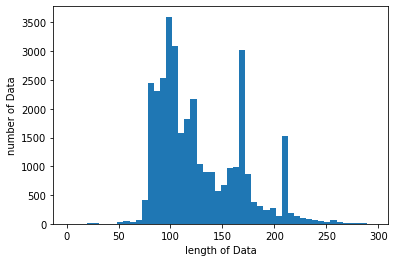

In [52]:
import matplotlib.pyplot as plt

print("문자의 최대 길이 :" , max(len(l) for l in X_train_new))
print("문자의 평균 길이 : ", sum(map(len, X_train_new))/ len(X_train_new))
plt.hist([len(s) for s in X_train_new], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [0]:
from keras.utils import np_utils
import numpy as np

y_train_new = []

for i in range(len(new_train_set['smishing'])):
  if new_train_set['smishing'].iloc[i] == 1:
    y_train_new.append([0, 1])
  elif new_train_set['smishing'].iloc[i] == 0:
    y_train_new.append([1, 0])

y_train_new = np.array(y_train_new)

In [0]:
from keras.utils import np_utils
import numpy as np

y_validation_new = []

for i in range(len(new_validation_set['smishing'])):
  if new_validation_set['smishing'].iloc[i] == 1:
    y_validation_new.append([0, 1])
  elif new_validation_set['smishing'].iloc[i] == 0:
    y_validation_new.append([1, 0])

y_validation_new = np.array(y_validation_new)

In [0]:
max_len = 295 # 전체 데이터의 길이를 380로 맞춘다

X_train_new = pad_sequences(X_train_new, maxlen=max_len)
X_validation_new = pad_sequences(X_validation_new, maxlen=max_len)
X_test_new = pad_sequences(X_test_new, maxlen=max_len)

In [59]:
model13 = Sequential()
model13.add(Embedding(max_words, 100))
model13.add(LSTM(128))
model13.add(Dense(2, activation='sigmoid'))

model13.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history13 = model13.fit(X_train_new, y_train_new, epochs=1, batch_size=32, validation_data=(X_validation_new, y_validation_new))

Train on 33766 samples, validate on 3640 samples
Epoch 1/1
33766/33766 [==============================] - 555s 16ms/step - loss: 0.0060 - acc: 0.9997 - val_loss: 5.9607 - val_acc: 0.5000


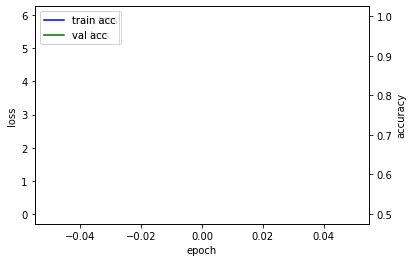

In [60]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history13.history['loss'], 'y', label='train loss')
loss_ax.plot(history13.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history13.history['acc'], 'b', label='train acc')
acc_ax.plot(history13.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [61]:
mypredict = model13.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_21_1.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_21_1.csv")

,id,smishing
0,340000,0.000008
1,340001,0.000008
2,340002,0.000008
3,340003,0.000008
4,340004,0.000008
...,...,...
1621,341621,0.000008
1622,341622,0.000008
1623,341623,0.000008
1624,341624,0.000008


In [0]:
mypredict = model6.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_14_6.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_14_6.csv")

,id,smishing
0,340000,0.000136
1,340001,0.022258
2,340002,0.000108
3,340003,0.000130
4,340004,0.000121
...,...,...
1621,341621,0.001613
1622,341622,0.000188
1623,341623,0.000061
1624,341624,0.000725


In [0]:
model7 = Sequential()
model7.add(Embedding(max_words, 100))
model7.add(LSTM(128))
model7.add(Dense(2, activation='sigmoid'))

model7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history7 = model7.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/3
33665/33665 [==============================] - 402s 12ms/step - loss: 0.0707 - acc: 0.9894 - val_loss: 0.0094 - val_acc: 0.9984
Epoch 2/3
33665/33665 [==============================] - 400s 12ms/step - loss: 0.0027 - acc: 0.9995 - val_loss: 0.0031 - val_acc: 0.9995
Epoch 3/3
33665/33665 [==============================] - 398s 12ms/step - loss: 6.2703e-04 - acc: 0.9999 - val_loss: 0.0015 - val_acc: 0.9997


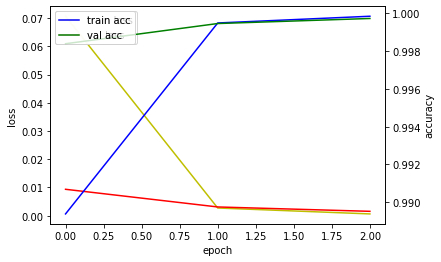

In [0]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history7.history['loss'], 'y', label='train loss')
loss_ax.plot(history7.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history7.history['acc'], 'b', label='train acc')
acc_ax.plot(history7.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
mypredict = model7.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_15.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_15.csv")

,id,smishing
0,340000,0.000050
1,340001,0.008809
2,340002,0.001054
3,340003,0.000698
4,340004,0.000033
...,...,...
1621,341621,0.000114
1622,341622,0.000204
1623,341623,0.000124
1624,341624,0.000088


# Mecab 으로도 해보자

In [0]:
import pandas as pd
train_data2 = pd.read_csv("model_kb_dacon02_trainset.csv")
test_data2 = pd.read_csv("public_test.csv")

In [0]:
test_data_text = list(test_data2['text'])

test_clear_text = []

for i in range(len(test_data_text)):
  test_clear_text.append(test_data_text[i].replace('XXX', ''))
test_data2['clear_text'] = test_clear_text

In [0]:
import re

test_clear_text = list(test_data2['clear_text'])

test_clear_text2 = []

for text in test_clear_text:
  temp = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', text)
  test_clear_text2.append(temp)
test_data2['clear_text2'] = test_clear_text2
test_data2

,id,year_month,text,clear_text,clear_text2
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...,고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난주 글...,고객님 안녕하세요 새롭게 시작하는 한 주 행복 가득하시길 기원합니다 지난주 글로벌 ...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...,긴급 안내 은행 가락동 지점 - 헬리오 기본 대출이자를 조합에서 납부...,긴급 안내 은행 가락동 지점 헬리오 기본 대출이자를 조합에서 납부했...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...,고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같든데 ...,고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다엊그제 새해가 시작된거같든데 벌...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...,고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다. 기...,고객님찾아온 행운을 잡으셨나요 못잡으셨다면 이번에 다시 잡으시길 기원합니다 기쁜날...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...,고객님새해 복 많이 받으세요 은행 코스트코 퇴직연금 담당자입니다. 고객님의 소중...,고객님새해 복 많이 받으세요 은행 코스트코 퇴직연금 담당자입니다 고객님의 소중한...
...,...,...,...,...,...
1621,341621,2019-04,(광고)XXX 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동...,(광고) 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동 지점...,광고 고객님안녕하십니까고객님의 소중한 업무처리를 도와드린 kb창원중앙동 지점 계장...
1622,341622,2019-04,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...
1623,341623,2019-04,XXX 고객님 저희 XXX은행 XXX지점을 이용해주셔서 감사드립니다 이번주도 더 ...,고객님 저희 은행 지점을 이용해주셔서 감사드립니다 이번주도 더 없이 즐겁고 행복...,고객님 저희 은행 지점을 이용해주셔서 감사드립니다 이번주도 더 없이 즐겁고 행복...
1624,341624,2019-04,(광고)알림 신청하면 매일 현금 100만원! XXX부동산 리브온지금 XXX부동산 리...,(광고)알림 신청하면 매일 현금 100만원! 부동산 리브온지금 부동산 리브온 App...,광고알림 신청하면 매일 현금 100만원 부동산 리브온지금 부동산 리브온 App에서 ...


In [0]:
from tqdm import tqdm
mecab = Mecab()
X_train2 = []
for i in tqdm(range(len(train_data['clear_text2']))):
  temp_X = []
  temp_X = mecab.morphs(train_data2['clear_text2'].iloc[i]) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_train2.append(temp_X)

100%|██████████| 37406/37406 [01:13<00:00, 511.03it/s]


In [0]:
X_test2 = []
for i in tqdm(range(len(test_data2['clear_text2']))):
  temp_X = []
  temp_X = mecab.morphs(test_data2['clear_text2'].iloc[i]) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_test2.append(temp_X)

100%|██████████| 1626/1626 [00:01<00:00, 1193.47it/s]


In [0]:
print(X_train2[:3])

[['광고', 'Ba', '고객', '언제나', '새로운', '마음가짐', '새롭', '준비', '합니다', '행상', '자격', '기준', '심사', '기준', '완화', '상품', '대해', '간단', '상품', '정보', '전달', '드립니다', '수신', '희망', '으실', '경우', '거부', '라는', '답장', 'KISA', '수신', '거부', '목록', '등록', '시켜', '다시', '발송', '도록', '조치', '취해', '드리', '습니다', '신청', '방법', '터치', '셔서', '문자', '상담', '또는', '00', '00', '상담', '라고', '답장', '보내', '거나', '전화', '친절', '안전', '상담', '도움', '드리', '습니다', '카카오톡', '상담', '서비스', '시행', 'citibankloan', '친구', '추가', '상담', '신청', '이런', '권해', '드립니다', '은행', '에서', '기존', '한도', '모두', '사용', '대출', '원리금', '방식', '인해', '입금액', '부담', '스러우', '채무', '금액', '으나', '채무', '건수', '아서', '관리', '고객', '말씀', '드립니다', '금리', '때문', '힘들', '다고', '느끼', '대출', '필요', '언제나', '고객', '에서', '든든', '파트너', '로서', '도와', '드리', '습니다', '상품', '특징', '거래', '으셔도', '진행', '가능', '은행', '보다', '한도', '자체', '등급', '판단', '므로', '신용자', '진행', '가능', '부채', '다면', '부채', '통합', '상품', '전환', '가능', '원리금', '방식', '이자', '납입', '만기', '일시', '전환', '가능', '가상', '조회', '통해', '한도', '금리', '확인', '가능', '상품', '안내', '직장', '전용', '신용', '상품', '한도', '최대', '

In [0]:
print(X_test2[:3])

[['고객', '안녕', '세요', '새롭', '시작', '행복', '가득', '기원', '합니다', '지난주', '글로벌', '증시', '파월', '연준', '의장', '통화', '정책', '대해', '완화', '태도', '변화', '보인', '주초', '투자', '심리', '개선', '이어지', '상승', '마감', '습니다', '더불', '차관', '무역', '협상', '순조', '진행', '긍정', '습니다', '달러', '환율', '주간', '75', '하락', '가운데', '외국인', '투자자', '국내', '증시', '매수', '규모', '천억', '상회', '수급', '개선', '주목', '필요', '습니다', '금주', '시장', '미국', '금융', '실적', '발표', '시작', '본격', '실적', '시즌', '진입', '됩니다', '지난주', '애플', '삼성전자', '주요', '기업', '분기', '실적', '전망', '하향', '조정', '참고', '한다면', '올해', '글로벌', '성장', '둔화', '기조', '에서', '기업', '순익', '감소', '추이', '관심', '살펴보', '필요', '보입니다', '후반', '브렉', '시트', '영국', '하원', '표결', '예정', '습니다', '추워진', '날씨', '건강', '유의', '세요', '감사', '합니다', '은행', '송도', '센터', '올림'], ['긴급', '안내', '은행', '가락동', '지점', '헬리오', '기본', '대출', '이자', '조합', '에서', '납부', '했었으나', '2018', '12', '25', '일부', '종료', '습니다', '따라서', '2019', '25', '부터', '매월', '25', '중도금', '대출', '이자', '계약자', '께서', '직접', '납부', '셔야', '됩니다', '방법', '안내', '자동', '등록', '은행', '영업', '본인', '방문', '신분증', '지참', '직원', '에게', 

In [0]:
from keras.preprocessing.text import Tokenizer
max_words = 35000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train2)
X_train2 = tokenizer.texts_to_sequences(X_train2)
X_test2 = tokenizer.texts_to_sequences(X_test2)

문자의 최대 길이 : 333
문자의 평균 길이 :  160.4158423782281


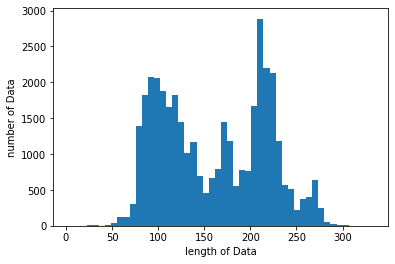

In [0]:
import matplotlib.pyplot as plt

print("문자의 최대 길이 :" , max(len(l) for l in X_train2))
print("문자의 평균 길이 : ", sum(map(len, X_train2))/ len(X_train2))
plt.hist([len(s) for s in X_train2], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

문자의 최대 길이 :  282
문자의 평균 길이 :  68.86223862238623


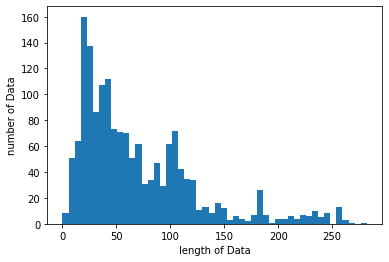

In [0]:
print("문자의 최대 길이 : ", max(len(l) for l in X_test2))
print("문자의 평균 길이 : ", sum(map(len, X_test2))/ len(X_test2))
plt.hist([len(s) for s in X_test2], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [0]:
from keras.utils import np_utils
import numpy as np

y_train2 = []

for i in range(len(train_data2['smishing'])):
  if train_data2['smishing'].iloc[i] == 1:
    y_train2.append([0, 1])
  elif train_data2['smishing'].iloc[i] == 0:
    y_train2.append([1, 0])

y_train2 = np.array(y_train2)

In [0]:
import pickle

with open('tokenizer_mecab_15.pickle', 'wb') as handle:
  pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
max_len = 333 # 전체 데이터의 길이를 380로 맞춘다

X_train2 = pad_sequences(X_train2, maxlen=max_len)
X_test2 = pad_sequences(X_test2, maxlen=max_len)

In [0]:
model11 = Sequential()
model11.add(Embedding(max_words, 100))
model11.add(LSTM(128))
model11.add(Dense(2, activation='sigmoid'))

model11.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history11 = model11.fit(X_train2, y_train2, epochs=2, batch_size=32, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/2
33665/33665 [==============================] - 615s 18ms/step - loss: 0.0243 - acc: 0.9950 - val_loss: 0.0033 - val_acc: 0.9992
Epoch 2/2
33665/33665 [==============================] - 615s 18ms/step - loss: 7.4150e-04 - acc: 0.9998 - val_loss: 0.0078 - val_acc: 0.9979


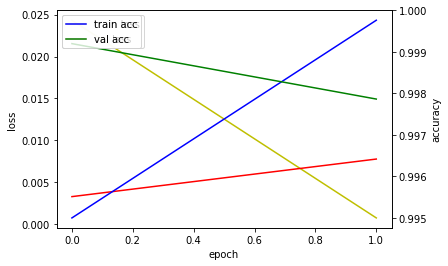

In [0]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history11.history['loss'], 'y', label='train loss')
loss_ax.plot(history11.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history11.history['acc'], 'b', label='train acc')
acc_ax.plot(history11.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
mypredict = model11.predict(X_test2)
submission_ids = list(test_data2['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_15_2.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_15_2.csv")

,id,smishing
0,340000,0.000002
1,340001,0.000407
2,340002,0.000042
3,340003,0.000005
4,340004,0.000002
...,...,...
1621,341621,0.000001
1622,341622,0.000004
1623,341623,0.000191
1624,341624,0.000001


In [0]:
model11.save("model_kb_dacon_15_2.h5")

In [0]:
model12 = Sequential()
model12.add(Embedding(max_words, 100))
model12.add(LSTM(128))
model12.add(Dense(2, activation='sigmoid'))

model12.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history12 = model12.fit(X_train2, y_train2, epochs=1, batch_size=32, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/1
33665/33665 [==============================] - 617s 18ms/step - loss: 0.0240 - acc: 0.9927 - val_loss: 0.0069 - val_acc: 0.9992


In [0]:
model12.save("model_kb_dacon_15_3.h5")

In [0]:
mypredict = model12.predict(X_test2)
submission_ids = list(test_data2['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_15_3.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_15_3.csv")

,id,smishing
0,340000,0.000031
1,340001,0.001534
2,340002,0.000147
3,340003,0.000026
4,340004,0.000021
...,...,...
1621,341621,0.000016
1622,341622,0.000028
1623,341623,0.000054
1624,341624,0.000017


In [0]:
pd.read_csv("kb_submission_14.csv")

,id,smishing
0,340000,0.000013
1,340001,0.000363
2,340002,0.000008
3,340003,0.000015
4,340004,0.000007
...,...,...
1621,341621,0.000052
1622,341622,0.000012
1623,341623,0.000004
1624,341624,0.000052


In [0]:
pd.read_csv("kb_submission_15_2.csv")

,id,smishing
0,340000,0.000002
1,340001,0.000407
2,340002,0.000042
3,340003,0.000005
4,340004,0.000002
...,...,...
1621,341621,0.000001
1622,341622,0.000004
1623,341623,0.000191
1624,341624,0.000001
